This notebook is part of the Data-Mining project, in which we are going to investigate the "Chess Game Dataset", The data can be found on Kaggle: "www.kaggle.com/datasnaek/chess"


A brief description of the dataset:
The dataset consists of the records of more than 20,000 games of chess played on the web platform "Lichess", for every game we have 16 features:
*   id: the id of the game.
*   rated: False/True, indicates if the game is rated or not
*   created_at : 
*   last_move_at
*   turns: The number of turns played in the game.
*   victory_status: the status of the game when ended (resigned, mate,...)
*   winner : (white/black/draw)
*   increment_code : time increment.
*   white_id: the white player id.
*   white_rating: the white player rating.
*   black_id: the black player id.
*   black_rating: the black player rating.
*   moves all the moves of the game in standard chess notation.
*   opening_eco: Standardised Code for any given opening (Encyclopaedia of Chess Openings), later on in this notebook we will encode each opening (using the name/eco) with its list of moves if needed. 
*   opening_name: The name of the opening.
*   opening_ply: Number of moves in the opening phase.

In the exploratory data analysis part of this notebook, we will discuss every feature of the previous features. 

Réalisé par: Laouar Ahmed
M2_IA

# Importing Libraries and Loading Data

In [214]:
# data analysis libraries:
import numpy as np
import pandas as pd
# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import math
# to display all columns:
pd.set_option('display.max_columns', None)

# to ignore warnings:
import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") 
    os.environ["PYTHONWARNINGS"] = "ignore" 

In [215]:
data = pd.read_csv(r"games.csv")

In [216]:
print("The size of the dataset is {}".format(data.shape))

The size of the dataset is (20058, 16)


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


# Exploratory Data Analysis

In [218]:
data.sample(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
13064,7HD3qUG1,True,1.494580e+12,1.494580e+12,44,resign,black,5+5,dkorezin5,1371,amir337,1432,e4 e5 Nf3 Nc6 Bc4 d6 O-O Bg4 c3 Nf6 b4 Nxe4 d3...,C50,Italian Game,5
1107,CzyKEMYc,True,1.497430e+12,1.497430e+12,35,resign,white,20+10,olek333,1833,s-a,1873,d4 Nf6 Bg5 c5 Bxf6 exf6 dxc5 Bxc5 Nf3 Qb6 e3 Q...,A45,Trompowsky Attack,3


In [219]:
#function to check for missing values
def missing_values(data):
    co = 0
    for col in data.columns.tolist():          
        if data[col].isnull().any():
            co += 1
            print('"{}" column missing values: {}'.format(col, data[col].isnull().sum()))
    print("Found a total of {} missing values".format(co))
print('missing values:')
missing_values(data)

missing values:
Found a total of 0 missing values


Describe numerical features

In [220]:
data.describe([0.1, 0.25, 0.5, 0.75])

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
10%,1.441480e+12,1.441480e+12,22.000000,1236.000000,1226.000000,2.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Describe categorical features

In [221]:
data.describe(include=["O"]).T

,count,unique,top,freq
id,20058,19113,XRuQPSzH,5
victory_status,20058,4,resign,11147
winner,20058,3,white,10001
increment_code,20058,400,10+0,7721
white_id,20058,9438,taranga,72
black_id,20058,9331,taranga,82
moves,20058,18920,e4 e5,27
opening_eco,20058,365,A00,1007
opening_name,20058,1477,Van't Kruijs Opening,368


From the description of the features:

we will be intrested more in the analysis phase on: 
the following discrete variables:
*   rated.
*   victory_status.
*   winner.
*   opening name.

and the following continuous variables:
*   turns.
*   white rating.
*   black rating.


Visualisation of the distribution of the discrete features

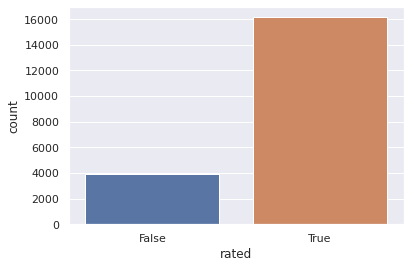

In [222]:
p = sns.countplot(x=data['rated'])
plt.show()

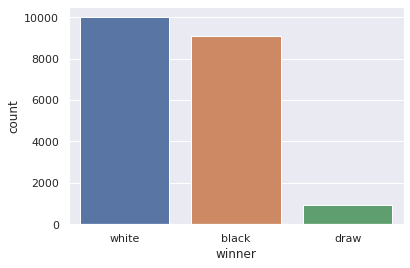

In [223]:
p = sns.countplot(x=data['winner'])
plt.show()

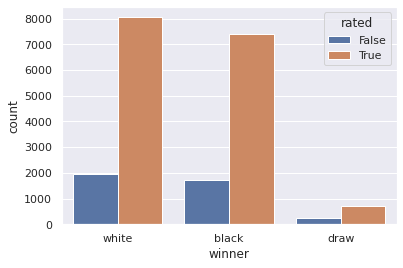

In [224]:
p = sns.countplot(x=data['winner'], hue=data['rated'])
plt.show()

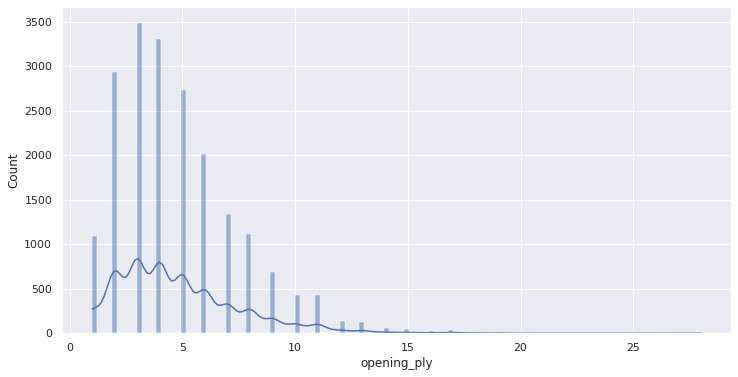

In [225]:
#checking the distribution of the opening_ply (number of moves of the opening phase)
fig, axs = plt.subplots(figsize=(12, 6))
sns.histplot(x=data['opening_ply'], kde=True)
plt.show()

Visualisation of the distribution of the number of turns in the dataset

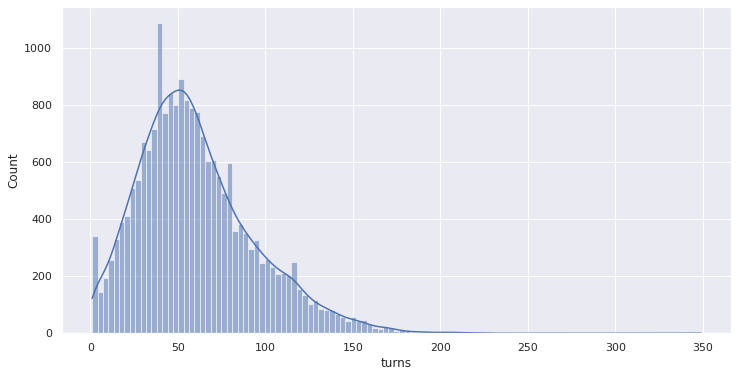

In [226]:
fig, axs = plt.subplots(figsize=(12, 6))
sns.histplot(data=data['turns'], kde=True)
plt.show()

The number of turns of every game grouped by the winner (draw, black, white)

In [227]:
data[["winner","turns"]].groupby('winner', as_index=False).mean().sort_values(by='turns', ascending=False)

,winner,turns
1,draw,86.157895
0,black,60.724388
2,white,57.790221


The number of turns of every game grouped by the victory status of the game

In [228]:
data[["victory_status","turns"]].groupby('victory_status', as_index=False).mean().sort_values(by='turns', ascending=False)

,victory_status,turns
0,draw,83.781457
2,outoftime,72.742857
1,mate,65.415020
3,resign,53.912533


The rate of games ended with a draw

In [229]:
print("The rate of games ended in a draw = {:.3f}%".format((data.loc[(data['winner'] == 'draw')].shape[0])*100/data.shape[0]))

The rate of games ended in a draw = 4.736%


Most used openings

In [230]:
len(data["opening_name"].value_counts())

1477

A high number of openings! looks like we have a lot of duplicates with a slightly difference in the name, let's perform some changes to bring them to normal.

In [231]:
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(":")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" |")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" #")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" Accepted")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" Declined")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" Refused")[0])

data["opening_name"].replace("King's Pawn Game", "King's Pawn", inplace = True)
data["opening_name"].replace("King's Pawn Opening", "King's Pawn", inplace = True)
data["opening_name"].replace("Old Indian Defense", "Old Indian", inplace = True)
data["opening_name"].replace("Queen's Pawn Game", "Queen's Pawn", inplace = True)
data["opening_name"].replace("Queen's Pawn Opening", "Queen's Pawn", inplace = True)
data["opening_name"].replace("Ware Defense", "Ware Opening", inplace = True)

In [232]:
len(data["opening_name"].value_counts())

122

Now we have a more realistic number of opening names, let's perform our analysis

In [233]:
mu_open = data.groupby('opening_name', as_index=False).size().sort_values(by='size', ascending=False)
print(mu_open.head(5))

         opening_name  size
104  Sicilian Defense  2632
38     French Defense  1412
90       Queen's Pawn  1376
52       Italian Game   981
60        King's Pawn   948


Most used opening used by black to win

In [234]:
wb_open = data[data['winner'] == 'black'].groupby('opening_name', as_index=False).size().sort_values(by='size', ascending=False)
print(wb_open.head(5))

        opening_name  size
95  Sicilian Defense  1299
35    French Defense   653
82      Queen's Pawn   646
47      Italian Game   451
55       King's Pawn   450


Most used opening by white to win

In [235]:
ww_open = data[data['winner'] == 'white'].groupby('opening_name', as_index=False).size().sort_values(by='size', ascending=False)
print(ww_open.head(5))

         opening_name  size
101  Sicilian Defense  1203
36     French Defense   689
87       Queen's Pawn   664
84     Queen's Gambit   512
49       Italian Game   483


The distribution of opening moves in terms of the winner 

In [236]:
do_ow = data.groupby(['opening_name', 'winner'], as_index=False).size().sort_values(by=['size', 'opening_name'], ascending=False)
do_ow.T

,262,264,95,227,93,225,220,128,150,246,126,148,203,81,218,251,244,249,79,44,42,201,256,292,254,90,28,307,122,88,206,181,243,136,263,305,294,124,26,167,204,265,267,118,147,2,169,241,144,119,116,49,142,134,190,23,176,192,121,50,0,178,145,175,297,173,94,179,226,161,69,295,281,25,67,230,99,279,261,245,127,259,101,211,198,141,84,75,62,163,82,149,219,212,200,233,209,110,78,43,289,76,228,30,20,214,29,139,80,306,248,231,202,274,73,60,250,22,224,108,105,239,189,291,247,222,129,123,38,184,186,166,87,300,282,266,205,164,302,272,237,27,10,293,287,187,53,255,140,89,24,277,278,215,156,152,284,260,208,182,143,104,303,285,183,174,96,70,14,151,107,72,54,1,304,242,216,191,168,135,17,19,232,180,177,113,98,55,32,21,8,4,234,92,37,280,193,172,131,120,100,68,66,36,31,3,268,229,199,117,115,111,103,85,64,51,48,39,33,273,253,236,223,221,210,194,158,154,146,52,46,35,12,296,290,286,283,270,252,195,196,197,159,160,157,153,132,133,125,112,83,59,56,5,276,258,240,238,207,188,170,138,130,109,106,97,61,57,40,41,18,7,301,298,299,288,275,271,269,257,235,217,213,185,171,165,162,155,137,114,102,91,86,77,74,71,65,63,58,47,45,34,15,16,13,11,9,6
opening_name,Sicilian Defense,Sicilian Defense,French Defense,Queen's Pawn,French Defense,Queen's Pawn,Queen's Gambit,Italian Game,King's Pawn,Ruy Lopez,Italian Game,King's Pawn,Philidor Defense,English Opening,Queen's Gambit,Scandinavian Defense,Ruy Lopez,Scandinavian Defense,English Opening,Caro-Kann Defense,Caro-Kann Defense,Philidor Defense,Scotch Game,Van't Kruijs Opening,Scotch Game,Four Knights Game,Bishop's Opening,Zukertort Opening,Indian Game,Four Knights Game,Pirc Defense,Nimzowitsch Defense,Russian Game,King's Gambit,Sicilian Defense,Zukertort Opening,Van't Kruijs Opening,Indian Game,Bishop's Opening,Modern Defense,Pirc Defense,Slav Defense,Slav Defense,Horwitz Defense,King's Knight Opening,Alekhine Defense,Modern Defense,Russian Game,King's Indian Defense,Hungarian Opening,Horwitz Defense,Center Game,King's Indian Defense,King's Gambit,Owen Defense,Bird Opening,Nimzo-Larsen Attack,Owen Defense,Hungarian Opening,Center Game,Alekhine Defense,Nimzo-Larsen Attack,King's Knight Opening,Nimzo-Indian Defense,Vienna Game,Nimzo-Indian Defense,French Defense,Nimzowitsch Defense,Queen's Pawn,Mieses Opening,Dutch Defense,Vienna Game,Three Knights Opening,Bird Opening,Dutch Defense,Rat Defense,Giuoco Piano,Three Knights Opening,Semi-Slav Defense,Ruy Lopez,Italian Game,Semi-Slav Defense,Giuoco Piano,Polish Opening,Petrov's Defense,King's Indian Attack,Englund Gambit,Elephant Gambit,Danish Gambit,Mieses Opening,Englund Gambit,King's Pawn,Queen's Gambit,Ponziani Opening,Petrov's Defense,Reti Opening,Polish Opening,Gruenfeld Defense,English Defense,Caro-Kann Defense,Van Geet Opening,English Defense,Rat Defense,Blackmar-Diemer Gambit,Benoni Defense,Ponziani Opening,Blackmar-Diemer Gambit,King's Indian Attack,English Opening,Zukertort Opening,Saragossa Opening,Reti Opening,Philidor Defense,St. George Defense,Elephant Gambit,Danish Gambit,Scandinavian Defense,Benoni Defense,Queen's Indian Defense,Gruenfeld Defense,Grob Opening,Robatsch (Modern) Defense,Old Indian,Van Geet Opening,Saragossa Opening,Queen's Indian Defense,Kadas Opening,Indian Game,Budapest Defense,Old Benoni Defense,Old Benoni Defense,Mikenas Defense,Englund Gambit Complex,Ware Opening,Torre Attack,Slav Defense,Pirc Defense,Mikenas Defense,Ware Opening,St. George Defense,Robatsch (Modern) Defense,Bishop's Opening,Anderssen Opening,Van't Kruijs Opening,Trompowsky Attack,Old Indian,Colle System,Scotch Game,King's Indian Attack,Four Knights Game,Bird Opening,Tarrasch Defense,Tarrasch Defense,Portuguese Opening,London System,Latvian Gambit,Torre Attack,Semi-Slav Defense,Polish Defense,Nimzowitsch-Larsen Attack,King's Indian Defense,Goldsmith Defense,Yusupov-Rubinstein System,Trompowsky Attack,Nimzowitsch-Larsen Attack,Nimzo-Indian Defense,Gedult's Opening,East Indian Defense,Barnes Defense,Latvian Gambit,Grob Opening,East Indian Defense,Colle System,Alekhine Defense,Yusup

The most used opening moves in the data

We have 122 openings, hence most of them are used only a few times while:

In [237]:
half_use = data.groupby('opening_name', as_index=False).size().sort_values(by='size', ascending=False)[0:40]['size'].sum() 
print("{:.2f}% of the openings are used in {:.2f}% of the data!!".format(40/122*100, half_use/data.shape[0]*100))

32.79% of the openings are used in 90.04% of the data!!


Checking the Victory status (how the game ended, it can be 'outoftime', 'resign', 'mate' or 'draw')
 

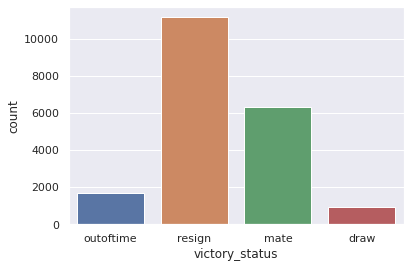

In [238]:
p = sns.countplot(x=data['victory_status'])
plt.show()

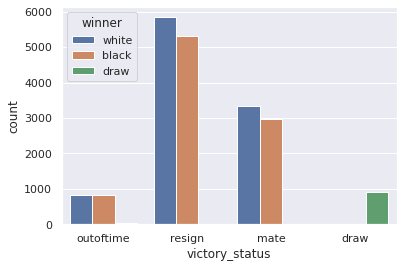

In [239]:
p = sns.countplot(x=data['victory_status'], hue=data['winner'])
plt.show()

Deriving 4 new features : winner_id, loser_id, winner_rating, loser_rating.
To make analytics easier (without having to go back to the winner feature to find who won or their rating)

In [240]:
for i in range(data.shape[0]):
  if data.loc[i, 'winner'] == 'black':
    data.loc[i, 'winner_id'] = data.loc[i, 'black_id']
    data.loc[i, 'loser_id'] = data.loc[i, 'white_id']
    data.loc[i, 'winner_rating'] = data.loc[i, 'black_rating']
    data.loc[i, 'loser_rating'] = data.loc[i, 'white_rating']
  if data.loc[i, 'winner'] == 'white':
    data.loc[i, 'winner_id'] = data.loc[i, 'white_id']
    data.loc[i, 'loser_id'] = data.loc[i, 'black_id']
    data.loc[i, 'winner_rating'] = data.loc[i, 'white_rating']
    data.loc[i, 'loser_rating'] = data.loc[i, 'black_rating']

Visualisation of the rate of the games where the better rated player won

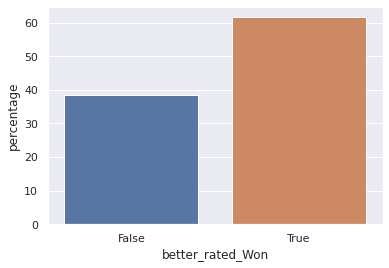

In [241]:
data['better_won'] = data['winner_rating'] > data['loser_rating']
pl = data['better_won'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
pl.columns = ['better_rated_Won', 'percentage']
sns.barplot(x='better_rated_Won', y='percentage', data=pl)

The player who won more games:

In [242]:
data['winner_id'].value_counts()

taranga               72
vladimir-kramnik-1    50
a_p_t_e_m_u_u         46
chesscarl             45
ducksandcats          43
                      ..
achter                 1
josefreitas            1
chessplay77            1
jack11                 1
ibanelani              1
Name: winner_id, Length: 8878, dtype: int64

Let's find next the proportion of games won by the best winning player where they had better rating

In [243]:
most_wins_id = data['winner_id'].value_counts().index[0]
print(most_wins_id)

taranga


In [244]:
better_rated = data.loc[(data['winner_id'] == most_wins_id) & (data['winner_rating'] >= data['loser_rating'])].shape[0]
all_games = data.loc[(data['winner_id'] == most_wins_id)].shape[0]
print("The number of games won by the most wining player where they had better rating = {}".format(better_rated))
print("The percentage of games won by the most wining player where they had better rating = {}%".format(better_rated/all_games*100))

The number of games won by the most wining player where they had better rating = 36
The percentage of games won by the most wining player where they had better rating = 50.0%


In [245]:
nbr_games = data.loc[(data['white_id'] == most_wins_id) | (data['black_id'] == most_wins_id)].shape[0]
rate_win = all_games/nbr_games*100
print("The player who won more games: '{}' has a winning rate of {:.2f}%".format(most_wins_id, rate_win))

The player who won more games: 'taranga' has a winning rate of 46.75%


Despite that this player won more games than any other in the dataset, but he lost more games than he won.

# Features Preprocessing

We want to get a new feature: "number of moves" which designs the number of moves made at each game,
we can extract this feature from the moves feature (which consists of the list of moves made in the game).

In [246]:
data['moves'][0]

'd4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'

In [247]:
data['splitted_moves'] = [x.split(' ') for x in data['moves']]

In [248]:
data['moves_count'] = [len(x) for x in data['splitted_moves']]

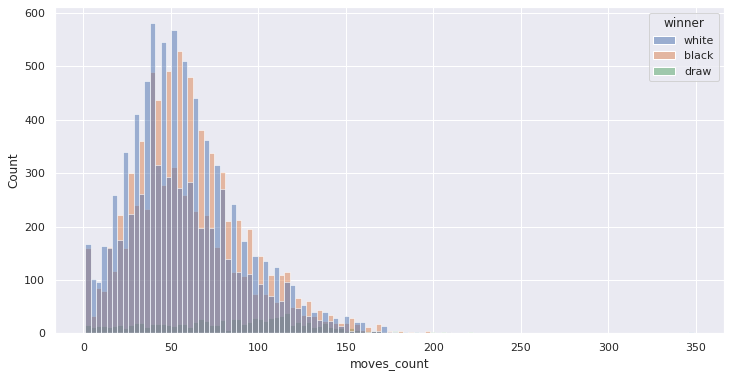

In [249]:
fig, axs = plt.subplots(figsize=(12, 6))
sns.histplot(x=data['moves_count'], hue=data['winner'])
plt.show()

Introducing a new feature duration

In [250]:
data['created_at_dt'] = pd.to_datetime(data['created_at']/1000, unit='s', origin='unix')
data['last_move_at_dt'] = pd.to_datetime(data['last_move_at']/1000, unit='s', origin='unix')
data['created_at_ts'] = [pd.Timestamp(x) for x in data['created_at_dt']]
data['last_move_at_ts'] = [pd.Timestamp(x) for x in data['last_move_at_dt']]

In [251]:
data['duration'] = (data['last_move_at_ts'] - data['created_at_ts']).astype('timedelta64[s]')

In [252]:
data['duration'].describe()

count     20058.000000
mean        869.439625
std        4814.218110
min           0.000000
25%           0.000000
50%         240.000000
75%         793.000000
max      605844.000000
Name: duration, dtype: float64

In [253]:
dur0 = data[data['duration'] == 0].shape[0]
print("The number of games that ended in 0 seconds is {}, this makes up {:.2f}% of the total number of games".format(dur0, dur0/data.shape[0]*100))

The number of games that ended in 0 seconds is 8548, this makes up 42.62% of the total number of games


In [254]:
mov0 = data[data['moves'] == 0].shape[0]
print("The number of games with 0 moves is {}".format(mov0))

The number of games with 0 moves is 0


This is contradictory to what we know about the dataset, we can't have a game with 0 seconds as duration while having a number of moves > 0 
The duration feature is useless in our study 

Discretization of the rating features (white_rating, black_rating)

In [255]:
#since we have two ratings features at each game, we will use the average of them to proceed with our analysis
print("The max rating in the dataset = {}".format(max(data['white_rating'].max(),data['black_rating'].max())))
print("The min rating in the dataset = {}".format(min(data['white_rating'].min(),data['black_rating'].min())))
print("The max rating in the dataset = {:.2f}".format((data['white_rating'].mean()+data['black_rating'].mean())/2))

The max rating in the dataset = 2723
The min rating in the dataset = 784
The max rating in the dataset = 1592.73


In [256]:
def brackets(x):
    n=900
    while n<2800:
        if x <=n:
            return f"{n-200} - {n}"
        n += 200

data["white_rating_bracket"] = data["white_rating"].apply(brackets)
data["black_rating_bracket"] = data["black_rating"].apply(brackets)

In [257]:
data["black_rating_bracket"].value_counts()

1300 - 1500    5257
1500 - 1700    4864
1700 - 1900    3803
1100 - 1300    2439
1900 - 2100    1913
2100 - 2300     853
900 - 1100      663
2300 - 2500     156
700 - 900        86
2500 - 2700      23
Name: black_rating_bracket, dtype: int64

In [258]:
data["white_rating_bracket"].value_counts()

1300 - 1500    5148
1500 - 1700    4977
1700 - 1900    3863
1100 - 1300    2339
1900 - 2100    1964
2100 - 2300     862
900 - 1100      629
2300 - 2500     176
700 - 900        60
2500 - 2700      40
Name: white_rating_bracket, dtype: int64

Introducing a new variable rating diff

In [259]:
data['rating_diff'] = data['white_rating'] - data['black_rating']

Getting the 1st move of every game

In [260]:
data['first_move'] = [x[0] for x in data['splitted_moves']]

We will create a model that predicts the games with a winner (black or white) only, the games ended in a draw are very few compared to the rest, so they will serve as a noise for our classification if we use them

In [261]:
data = data[data['winner'] != 'draw']

In [262]:
data.reset_index(drop=True, inplace=True)

In [263]:
data.shape

(19108, 32)

Now we will try to create a classification model, the features we will be using are the following : 
"rated", "victory_status", "winner", "first_move", "turns", "white_rating", "black_rating", "opening_ply", "increment_code", "opening_eco", "opening_name", "rating_diff".
we will use a Decision tree model first

In [264]:
model_data = data[["rated", "victory_status", "winner", "turns", "white_rating_bracket", "black_rating_bracket", "first_move", "opening_ply", "increment_code", "opening_eco", "opening_name", "rating_diff"]]

In [265]:
model_data.head()

,rated,victory_status,winner,turns,white_rating_bracket,black_rating_bracket,first_move,opening_ply,increment_code,opening_eco,opening_name,rating_diff
0,False,outoftime,white,13,1300 - 1500,1100 - 1300,d4,5,15+2,D10,Slav Defense,309
1,True,resign,black,16,1300 - 1500,1100 - 1300,d4,4,5+10,B00,Nimzowitsch Defense,61
2,True,mate,white,61,1300 - 1500,1300 - 1500,e4,3,5+10,C20,King's Pawn,-4
3,True,mate,white,61,1300 - 1500,1300 - 1500,d4,3,20+0,D02,Queen's Pawn,-15
4,True,mate,white,95,1500 - 1700,1300 - 1500,e4,5,30+3,C41,Philidor Defense,54


In [266]:
model_data.shape

(19108, 12)

Visualisation of the Correlation using a heatmap plot 

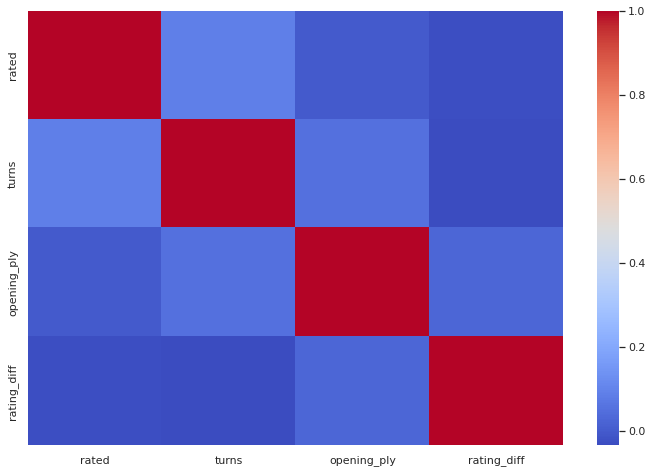

In [267]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(model_data.corr(), cmap='coolwarm')

We will start with hot encoding 'increment_code','opening_eco','opening_name'
because they are features with high cardinality

In [268]:
from sklearn.preprocessing import OneHotEncoder
highcard = model_data[['increment_code','opening_eco','opening_name']].copy()
sparse_high = OneHotEncoder().fit_transform(highcard)
highcard = pd.DataFrame(sparse_high.toarray())

Preprocessing categorical features

In [269]:
cat_features = model_data[["rated", "victory_status", "white_rating_bracket", "black_rating_bracket", "first_move"]].copy()
cat_features['rated'] = cat_features['rated'].map({False: 0, True:1})
cat_features = pd.get_dummies(cat_features)

Scaling numerical features

In [270]:
from sklearn.preprocessing import MinMaxScaler
num_features = model_data[["turns", "rating_diff", "opening_ply"]].copy()

MinMax = MinMaxScaler(feature_range=(-1,1))  
df_arr = MinMax.fit_transform(num_features)

num_features  = pd.DataFrame(df_arr, index=model_data.index)
num_features.columns = ["turns", "rating_diff", "opening_ply"]

In [271]:
cat_features.shape,num_features.shape,highcard.shape

((19108, 44), (19108, 3), (19108, 875))

In [272]:
model_data = pd.concat([cat_features,num_features,highcard], axis=1)

In [273]:
model_data.shape

(19108, 922)

In [274]:
model_data.columns = model_data.columns.astype('str')

# Model building

In [275]:
#Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [276]:
X = model_data
y = data["winner"]

Creating a train/test split

In [277]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15286, 922), (15286,), (3822, 922), (3822,))

In [278]:
dt_clf = tree.DecisionTreeClassifier(criterion='entropy')
nb_clf = GaussianNB(var_smoothing=0.5)
rf_clf = RandomForestClassifier(criterion='entropy')
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
svc_clf = SVC()

In [279]:
dt_clf.fit(x_train, y_train)
nb_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train,y_train)

SVC()

In [280]:
dt_score = dt_clf.score(x_test, y_test)
nb_score = nb_clf.score(x_test, y_test)
rf_score = rf_clf.score(x_test, y_test)
knn_score = knn_clf.score(x_test, y_test)
svc_score = svc_clf.score(x_test, y_test)

In [281]:
score_list = [dt_score, nb_score, rf_score, knn_score, svc_score]

Text(0.5, 1.0, 'Accuracy Score for Different Classification Models')

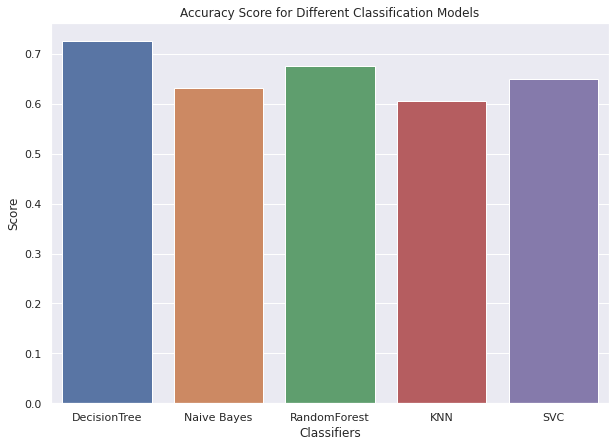

In [282]:
plt.figure(figsize=(10,7))

models_list = ['DecisionTree', 'Naive Bayes', 'RandomForest', 'KNN', 'SVC']

chart = sns.barplot(x=models_list, y=score_list)
plt.xlabel('Classifiers')
plt.ylabel('Score')

plt.title('Accuracy Score for Different Classification Models')

Results of the best performing model

In [283]:
print(classification_report(y_true=y_test, y_pred=dt_clf.predict(x_test)))

              precision    recall  f1-score   support

       black       0.70      0.72      0.71      1767
       white       0.75      0.73      0.74      2055

    accuracy                           0.73      3822
   macro avg       0.72      0.73      0.73      3822
weighted avg       0.73      0.73      0.73      3822



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


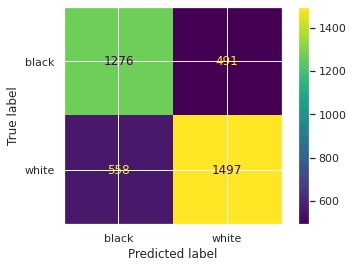

In [284]:
print(plot_confusion_matrix(clf, x_test, y_test))

Visualization of part of the decision tree with a depth = 4 

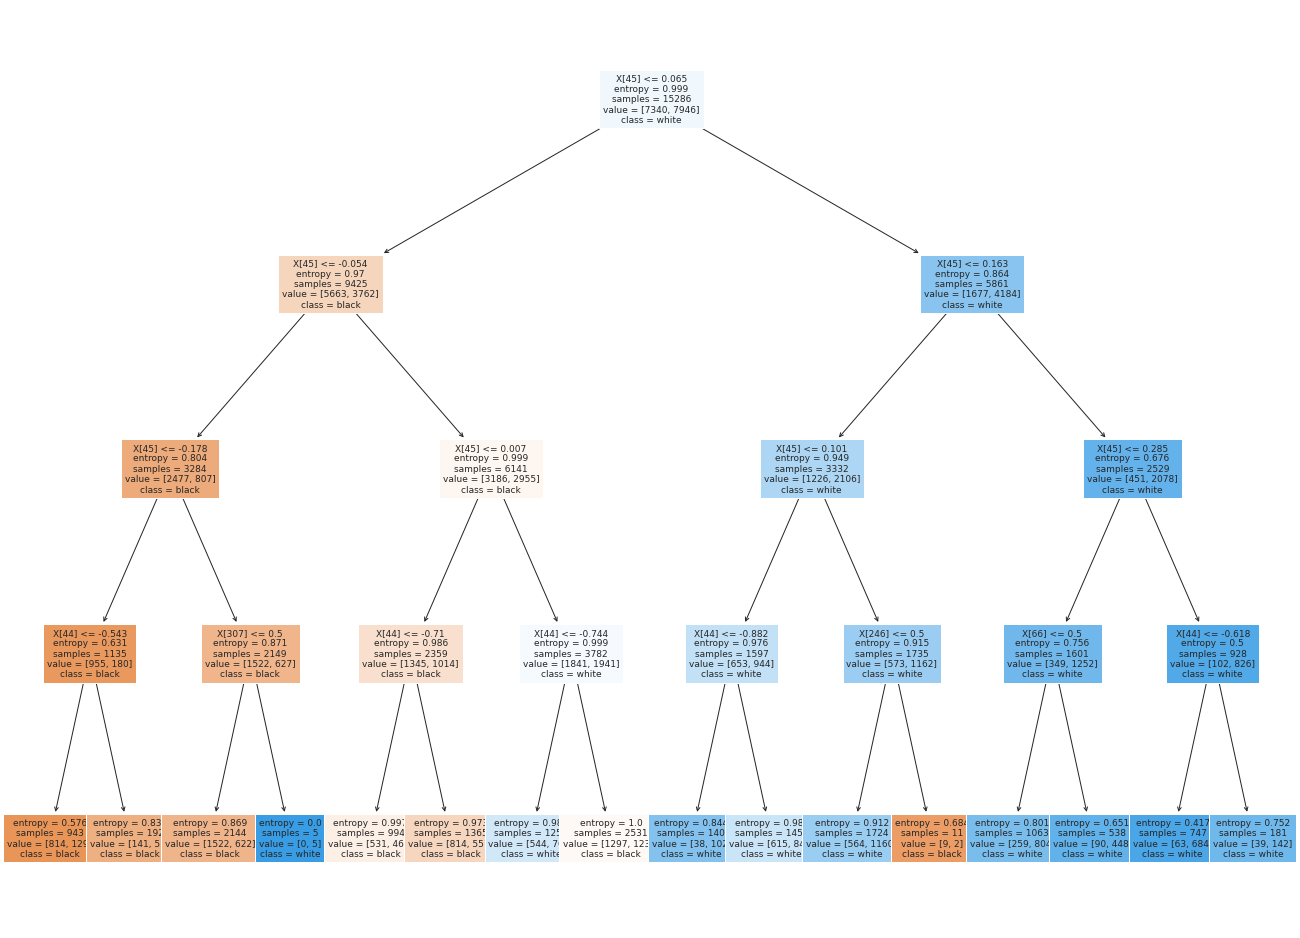

In [285]:
from sklearn import tree
tree_class2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

tree_class2.fit(x_train,y_train)
plt.figure(figsize=(23,17))
tree.plot_tree(tree_class2, 
               fontsize=9,  # text font size
               filled=True, # background color on each node
               class_names=tree_class2.classes_, # match class/target id with target/Iris type
              )
plt.show()